## 2. Feature selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/loan_target.csv', low_memory=False)

In this section, we will discard fetaures that don't add value to our prediction model using different methods. A fundamental aspect of data analysis work is knowing the environment or business  which the data belongs. Another important aspect is to verify the number of missing values that contain the features and make decisions to select the elimination of the features with respect to the volume of Na values that they contain. Finally, a correlation analysis is performed to verify the relationships between the features and deduce which ones represent other features, maintaining most of the information and eliminating a considerable number of records.

### 2.1. Financial knowledge

Based in our financial knowledge we select a list of features that we think they aren't relevant or leak information from the future, information that the bank didn't have when the loan had been granted. It is necessary to delete them, because if we include them in our model, we may be at risk of introducing noise into the model.

In [3]:
drop = ['acc_open_past_24mths',
        'policy_code',
        'chargeoff_within_12_mths',
        'collections_12_mths_ex_med',
        'delinq_2yrs',
        'delinq_amnt',
        'issue_d',
        'initial_list_status',
        'il_util',
        'member_id',
        'mo_sin_old_il_acct',
        'mo_sin_old_rev_tl_op',
        'mo_sin_rcnt_rev_tl_op',
        'mo_sin_rcnt_tl',
        'mths_since_last_delinq',
        'mths_since_last_major_derog',
        'mths_since_last_record',
        'mths_since_rcnt_il',
        'mths_since_recent_bc',
        'mths_since_recent_bc_dlq',
        'mths_since_recent_inq',
        'mths_since_recent_revol_delinq',
        'next_pymnt_d',
        'num_accts_ever_120_pd',
        'num_actv_bc_tl',
        'num_actv_rev_tl',
        'num_bc_sats',
        'num_bc_tl',
        'num_il_tl',
        'num_op_rev_tl',
        'num_rev_accts',
        'num_rev_tl_bal_gt_0',
        'num_sats',
        'num_tl_120dpd_2m',
        'num_tl_30dpd',
        'num_tl_90g_dpd_24m',
        'num_tl_op_past_12m',
        'open_acc_6m',
        'open_il_12m',
        'open_il_24m',
        'open_act_il',
        'open_rv_12m',
        'open_rv_24m',
        'revol_bal',
        'revol_bal_joint',
        'revol_util',
        'total_bal_ex_mort',
        'zip_code',
        'funded_amnt',
        'funded_amnt_inv',
        'hardship_flag']

In [4]:
cleandf = df.drop(drop, axis=1)

### 2.2. NAs values

We would like to select the largest number of variables to keep most of the information and thus build a better prediction model. After analyzing the percentage on NAs values, we have decided to delete the variables with a percentage over 50% `desc`,`inq_last_12m` and `inq_fi` becouse we think they have relevant information although all the missing data they have.

In [5]:
nulls2 = pd.DataFrame(round(cleandf.isnull().sum()/len(cleandf.index)*100,2),columns=['null_percent'])

In [6]:
filtro = nulls2['null_percent']>50
empty = nulls2[filtro]

In [7]:
cleandf = cleandf.drop(list(empty.index), axis=1)

We check the dimension of the dataset

In [8]:
len(cleandf.columns)

52

In [9]:
cleandf = cleandf.join(df.loc[:,['desc','inq_last_12m','inq_fi']])

In the section of treatment of variables we will treat the NaN values by different procedures.

### 2.3. Correlation analysis

We will select the numerical variables and we will make an analysis of the correlations. Later we will eliminate the variables with a high degree of correlation.

In [10]:
cleandf.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
title                          object
addr_state                     object
dti                           float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
total_acc                     float64
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_prncp               float64
total_rec_in

In [11]:
numeric = cleandf.select_dtypes(include = [np.number])

In [12]:
numeric.drop('target', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
corr = numeric[numeric.columns[:]].corr()

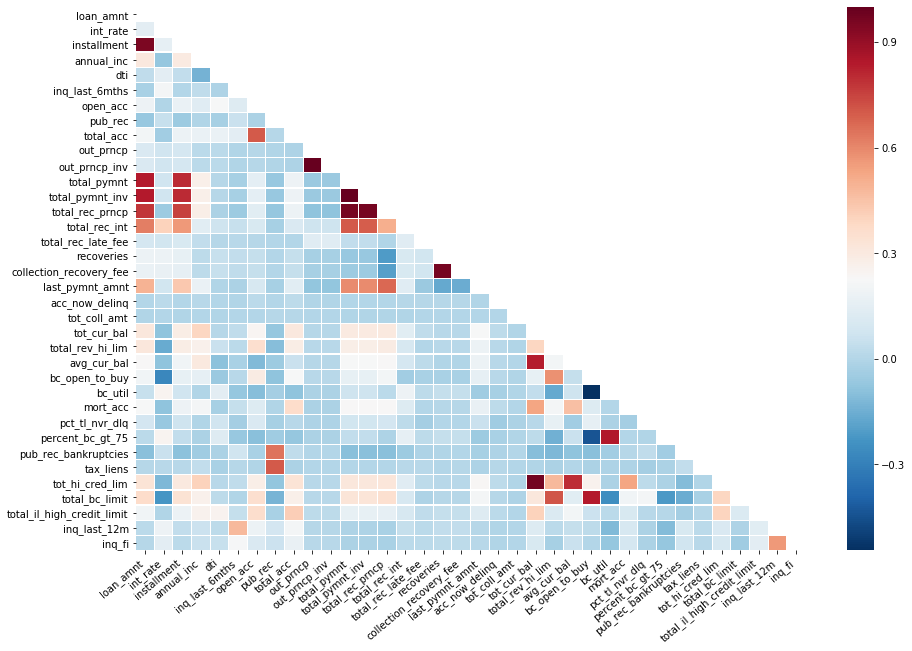

In [14]:
plt.subplots(figsize=(15,10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cor_plot = sns.heatmap(corr, cmap='RdBu_r', mask=mask, linewidths=.2)
bottom, top = cor_plot.get_ylim()
cor_plot.set_ylim(bottom + 0.5, top - 0.5)
cor_plot.set_xticklabels(cor_plot.get_xticklabels(), rotation=40, ha="right")
plt.savefig("../images/correlations.jpg", bbox_inches="tight");

We also drop `grade` and `title` features as such data is also carried in `sub_grade` and `purpose`

In [15]:
drop3 = ['bc_open_to_buy',
         'total_bc_limit',
         'avg_cur_bal',
         'percent_bc_gt_75',
         'pub_rec',
         'grade',
         'title',
         'last_pymnt_d',
         'last_credit_pull_d',
         'debt_settlement_flag',
         'last_pymnt_amnt',
         'inq_last_12m',
         'pymnt_plan',
         'out_prncp',
         'out_prncp_inv',
         'total_rec_int',
         'total_rec_late_fee',
         'recoveries',
         'collection_recovery_fee',
         'acc_now_delinq',
         'tot_coll_amt',
         'installment',
         'total_pymnt',
         'total_pymnt_inv',
         'total_rec_prncp',
         'total_acc',
         'open_acc',
         'inq_fi',
         'tot_hi_cred_lim']

In [16]:
cleandf = cleandf.drop(drop3, axis=1)

In [17]:
cleandf.head()

,loan_amnt,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,...,total_rev_hi_lim,bc_util,mort_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_il_high_credit_limit,disbursement_method,target,desc
0,30000,36 months,22.35,D5,Supervisor,5 years,MORTGAGE,100000.0,Source Verified,debt_consolidation,...,42200.0,46.9,1.0,89.5,1.0,0.0,101984.0,Cash,0,NaN
1,40000,60 months,16.14,C4,Assistant to the Treasurer (Payroll),< 1 year,MORTGAGE,45000.0,Verified,credit_card,...,54200.0,67.3,1.0,100.0,0.0,0.0,167965.0,Cash,0,NaN
2,20000,36 months,7.56,A3,Teacher,10+ years,MORTGAGE,100000.0,Not Verified,credit_card,...,85100.0,29.9,5.0,94.7,0.0,0.0,74833.0,Cash,0,NaN
3,4500,36 months,11.31,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,credit_card,...,29200.0,28.9,0.0,91.7,0.0,0.0,24595.0,Cash,0,NaN
4,8425,36 months,27.27,E5,Senior Director Risk Management,3 years,MORTGAGE,450000.0,Verified,credit_card,...,56000.0,74.6,4.0,100.0,0.0,0.0,189054.0,Cash,0,NaN


In [18]:
# save to local disk
cleandf.to_csv('../data/loan_selected.csv', index=False)